In [ ]:
import numpy as np

import matplotlib.pyplot as plt


# How numpy make copy and how to avoid unnecessary copy?

In [ ]:

'''
    It returns whether two arrays share same underlying data buffer in memory,
    it is used in checking whether two numpy arrays are making copies while doing different types of operation, like multiyplying or addition , slicing
'''
import numpy as np
def aid(x):
    # This function returns the memory
    # block address of an array.
    return x.__array_interface__['data'][0]

arr1 = np.array([1,2,3,4,5]); arr2 = np.array([1, 45, 78, ] )
mem1 = aid(arr1)
mem2 = aid(arr2)
print(f"Memory block address for {arr1}\t",mem1)
print(f"Memory block address for {arr2}\t", mem2)
a = np.zeros(3)
aid(a), aid(a[2:]),aid(a[1])==aid(a[2])


Memory block address for [1 2 3 4 5]	 94687164578560
Memory block address for [ 1 45 78]	 94687179530880


(94687179530912, 94687179530928, True)

In [ ]:
'''
    More general way of finding whether two arrays have same data or not
'''
def get_data_base(array):
    base = array
    while isinstance(base.base, np.ndarray):
        base = base.base
    return base

def array_share_data(x,y):
    return get_data_base(x) is get_data_base(y)

arr1 = np.zeros(3); arr2 = np.ones(3); arr3 = np.array([4,5,6]); arr4 = np.array([-4,-5,-6])
get_data_base(arr1)
print(f"arr1\t{arr1}\narr2\t{arr2}\narr3\t{arr3}\narr4\t{arr4}")

print("Are two arrays share same data or not?\n")
print(f"arr1,arr3\t{array_share_data(arr1, arr3)}\narr2, arr4\t{array_share_data(arr2,arr4)}\n")

print("arr1,arr1.copy()\t{}\narr1,arr1[:]\t{}\narr1,arr1[1]\t{}\narr1,arr1[1:]\t{}".format(array_share_data(arr1,arr1.copy()),array_share_data(arr1,arr1[:]),array_share_data(arr1,arr1[1]), array_share_data(arr1,arr1[1:])) )

arr1	[0. 0. 0.]
arr2	[1. 1. 1.]
arr3	[4 5 6]
arr4	[-4 -5 -6]
Are two arrays share same data or not?

arr1,arr3	False
arr2, arr4	False

arr1,arr1.copy()	False
arr1,arr1[:]	True
arr1,arr1[1]	False
arr1,arr1[1:]	True


In [ ]:
# Now, if we multiply a array and check whehter they have same memory block location or not

arr= arr1*2+2

print(f"Is both have same memory block address or not?\n{array_share_data(arr, arr1)}")
print(f"{aid(arr)==aid(arr1)}")

Is both have same memory block address or not?
False
False


In [ ]:
a = np.zeros(3); ax = aid(a)
print("a",a)
a *= 2
'''
    a*=2 and a=a*2 both do not have same address, previously we thought both of them as same operation, but this is not true, as in second operation
    it is implicit copy and create new array and in first it is doing operation in-place
'''
# a = a *2
print(aid(a) == ax)
# True
c = a * 2
print(aid(c) == ax)
# False
print("a",a,"c",c)

a [0. 0. 0.]
True
False
a [0. 0. 0.] c [0. 0. 0.]


In [ ]:

# 4.85 ms ± 24 µs per loop (mean ± std. dev. of 7 runs,
# 100 loops each)
%timeit b = a * 2

# 7.7 ms ± 105 µs per loop (mean ± std. dev. of 7 runs,
# 100 loops each)

The slowest run took 22.38 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.18 µs per loop


In [ ]:
import time
x  = time.time()

a = np.zeros(100_00_000)
a*=2

print(time.time()-x)


0.053755998611450195


In [ ]:
x  = time.time()

a = np.zeros(100_00_000)
b = a*2
print(time.time()-x)


0.07009458541870117


In [ ]:
# 
a = np.zeros((100, 100))

# different address
c = np.zeros((100,100))
ax = aid(a)
print(aid(a)==aid(c))

# reshaping do not make copy, so both have same address
b = a.reshape((1, -1))
print(aid(b) == ax)

# transpose make copy, there is significant time different for this operation, it is 100*100 array   
c = a.T.reshape((1, -1))
print(aid(c) == ax)


False
True
False


In [ ]:
%timeit e = a.reshape((1, -1))

# The slowest run took 46.00 times longer than the fastest. This could mean that an intermediate result is being cached.
# 1000000 loops, best of 5: 391 ns per loop

%timeit d = a.T.reshape((1, -1))

# The slowest run took 123.00 times longer than the fastest. This could mean that an intermediate result is being cached.
# 100000 loops, best of 5: 6.81 µs per loop

The slowest run took 28.35 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 415 ns per loop
The slowest run took 5.45 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 6.7 µs per loop


In [ ]:
# Numpy operation of converstion of n dimenstional array into 1 dimenstional array, two inbuilt methods --flatten and ravel

'''
    flatten make copy of array and covert into 1-D array, 
    ravel not always make copy of array to convert it into 1-D array. Significant performance gain could be achive by this
'''

d = a.flatten()

print("flatten method\n",aid(a)==aid(d) )

e = a.ravel()
print("ravel method\n", aid(a)==aid(e))

%timeit a.flatten()
print()
%timeit a.ravel()



flatten method
 False
ravel method
 True
The slowest run took 85.45 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.37 µs per loop

The slowest run took 24.74 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 269 ns per loop


In [ ]:

n = 100
a = np.arange(n)
ac = a[:, np.newaxis]  # column vector
ar = a[np.newaxis, :]  # row vector
%timeit np.tile(ac, (1, n)) * np.tile(ar, (n, 1))
print()
%timeit ar * ac


10000 loops, best of 5: 56.9 µs per loop

The slowest run took 11.25 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 12.8 µs per loop


In [ ]:
n = 10000

a = np.arange(n)
ac = a[:, np.newaxis]  # column vector
ar = a[np.newaxis, :]  # row vector

# it is making copies and reshaping and taking tranpose
%timeit np.tile(ac, (1, n)) * np.tile(ar, (n, 1))
print()

# this is broadcasting method 
%timeit ar * ac


1 loop, best of 5: 655 ms per loop

10 loops, best of 5: 85.7 ms per loop


In [ ]:
k = np.arange(10)
k = a[:,np.newaxis]

n = np.tile(k,(1,10))

%timeit a[:,np.newaxis]
print()
%timeit np.tile(k,(1,10))


The slowest run took 20.01 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 338 ns per loop

1000 loops, best of 5: 1.05 ms per loop


###Working with strides to avoid unnecessary array copy and understa

In [ ]:
'''
    Strides are the number of bytes you need to step in each dimension when traversing the array.
'''

'\n    Strides are the number of bytes you need to step in each dimension when traversing the array.\n'

Broadcasting rules in numpy 

Comparing of dimensions of two arrays either equal or 1, generally ndarray is compatible with either 1D array or nD array, like 3D [[1,2,3], [1,2,3] , [7,8,9]] is compatible with [1,2,3], [[1,2,3], [1,2,3] , [7,8,9]]
```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3

A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```

It depends on internal structure of arrays, in above case , when we have differnt demension arrays, still broadcasting possible, we have 8 arrays containing 1 arrays of shape 6 x 1 shape array, and B arrays we have 7 diffrent arrays all have shape of 1 x 5 , which is compatible with 6 x1, so reslting shape will be 6 x 5. genrally 

In [ ]:
array_4d = np.array([[
                    [[1,2,3], [1,2,3] , [7,8,9]],
                      [[1,2,3], [1,2,3] , [7,8,9]]
                      ],[
                    [[1,2,3], [1,2,3] , [7,8,9]],
                      [[1,2,3], [1,2,3] , [7,8,9]]
                      ]])
array_4d.shape, array_4d.ndim

array_4d_ = np.ones((8,2,6,1))
array_4d = np.ones((9, 1,8))

# value error due to is mismatch
# array_4d *array_4d_


# mismatch broadcasting not possible
# array_4d_*array_4d
(array_4d_ *np.array([1,2,3])).shape

(8, 2, 6, 3)


Strides are the number of bytes you need to step in each dimension when traversing the array, ndarray of shape = (2,3)--np.array( [[1,2,3],[4,5,6]] )

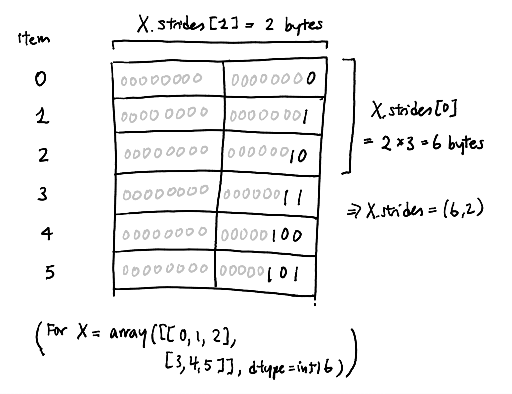

In [ ]:
# It is just image reshape function --usefull in above image case in which we need to download from web and then show here like above.
def reshape_image(m,n,path):
    import PIL
    img = PIL.Image.open(path)
    m = img.resize(size=(m,n))
    m.save("/content/resize.png")
    return True

In [ ]:
import numpy as np

arr = np.array([[[1,2,3],[4,5,6],[4,5,6]]],dtype=np.int16)
arr.strides, arr.shape, arr.size,arr.dtype

((18, 6, 2), (1, 3, 3), 9, dtype('int16'))

In [ ]:

import numpy as np
from timeit import timeit
from numpy.lib.stride_tricks import as_strided
 
 
# Generate array of (fake) closing prices
prices = np.random.randn(100)
 
# We want closing prices from the ten days prior
window = 10
# Create array of closing prices to predict
y = prices[window:]
 
def make_X1():
    # Create array of zeros the same size as our final desired array
    X1 = np.zeros([len(prices) - window, window])
    # For each day in the appropriate range
    for day in range(len(X1)):
        # take prices for ten days from that day onwards
        X1[day,:] = prices[day:day+window]
    return X1
 
def make_X2():
    # Save stride (num bytes) between each item
    stride, = prices.strides
    desired_shape = [len(prices) - window, window]
    # Get a view of the prices with shape desired_shape, strides as defined, don't write to original array 
    X2 = as_strided(prices, desired_shape, strides=[stride, stride], writeable=False)
    return X2 
 
timeit(make_X1) # 56.7 seconds 
timeit(make_X2) # 7.7 seconds, over 7x faster!


7.903309489999998

#Advanced Numpy from scipy lecture
### This is about how do you handle memory of array and numpy internal structure.

In [ ]:
# if we do not specify dtype (which is about how much memory in bytes allocated to each element of array and data type),
# numpy will handle dtype better and more efficient than us sometimes.
# it is deafult to int64 if all are integer type

mem_address = []
arr = np.array([7,8,9], dtype=np.int32)

print("Bytes data of arr", arr.data)
print(bytes(arr.data))
arr_pointing= arr.copy()
arr_pointing.strides = [3]
arr.strides = [3]
print("Array interface\n",arr.__array_interface__,"\n")
print(arr_pointing.__array_interface__)

'''
for arr, arr_pointing

this is not stable memory address, if you run it again, then this is could be interchanged.
only three diffrent memory address are found, you can loop as many as as want, 
'''
for i in range(1):
    mem_address.append([arr.__array_interface__['data'][0], arr_pointing.__array_interface__['data'][0]])
mem_address

Bytes data of arr <memory at 0x7f3de4310870>
b'\x07\x00\x00\x00\x08\x00\x00\x00\t\x00\x00\x00'
Array interface
 {'data': (93922064216080, False), 'strides': (3,), 'descr': [('', '<i4')], 'typestr': '<i4', 'shape': (3,), 'version': 3} 

{'data': (93922064216112, False), 'strides': (3,), 'descr': [('', '<i4')], 'typestr': '<i4', 'shape': (3,), 'version': 3}


[[93922064216080, 93922064216112]]

In [ ]:
# deleting funtion after using it, --found good practice of removing functions after their use or they are usefull only for once from numpy source code.

def sanity_check(arr):
    if type(arr)!=np.ndarray:
        return "This is only for numpy ndarray"
    if abs(arr.dot(arr)-2.0)>0:
        return arr.dot(arr)

sanity_check(np.array([1,2,3,4]))
del sanity_check
try:
    sanity_check
except NameError:
    print("deleted")


deleted


In [ ]:
# dtype  type
print(np.dtype('int').type)

# byteorder
print(np.dtype('int').byteorder)

# itemsize --size of each element in array in bytes --deafult size is assigned by numpy which is highly efficient both for int and float types, 8 bytes
np.dtype('float').itemsize

<class 'numpy.int64'>
=


8

**All numpy arrays are stored in memory block, either you are doing copy or alter array, all are happened in block of memory**

**Casting in arithmetic, in nutshell:**

* only type (not value!) of operands matters
* largest “safe” type able to represent both is picked
* scalars can “lose” to arrays in some situations
**Casting in general copies data:*

It is notation for strides and shape in general form.


Here C or F are C-order (default) or Fortan Order 

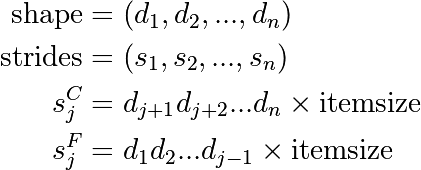

In [ ]:
arr = np.array([[[1,2,3,4 ],[1,2,3,4], [1,2,3,4 ],[1,2,3,4]]])
arr.dtype

# it creates copy of given array
y = arr.astype(arr.dtype)

assert aid(y)==aid(arr)

#
# print(y)
x = y[:]+4
print(array_share_data(x, y))
y[:] = y[:]+4; x = y[:,:,:] 
array_share_data(x, y)
# aid(y)==aid(x)
array_share_data(arr, arr[:,:,:]); print(arr.shape)

# slice operation do not copy array data, it is opposite in python for list data

arr1 = np.array([3,2,8], dtype=np.int8)
arr2 = arr1.copy()
print(array_share_data(arr1, arr1[:]))

print("Bytes stored for numpy array in memory", bytes(arr1))

False
(1, 4, 4)
True
Bytes stored for numpy array in memory b'\x03\x02\x08'


In [ ]:
arr1 = np.array([3,2,8], dtype=np.int0)
arr2 = arr1.copy()
print(array_share_data(arr1, arr1[:]))

arr2.dtype= 'uint8'

arr2.dtype="<i2"
print("Bytes stored of numpy array data in read only memory", bytes(arr2))
arr1.astype(np.int0).itemsize

True
Bytes stored of numpy array data in read only memory b'\x03\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00'


8

In [ ]:
x = np.zeros((10, 10, 4), dtype=np.int16)
x[:, :, 0] = 1
x[:, :, 1] = 2
x[:, :, 2] = 3
x[:, :, 3] = 4

# structured array
y = np.dtype([('r',"int16"),('g',"int16"),('b',"int16"),('a',"int16")])
x.dtype = y

assert (x['r'] == 1).all()  
assert (x['g'] == 2).all()  
assert (x['b'] == 3).all()  
assert (x['a'] == 4).all()  
print("it is passed")


# structured with view method,
x = np.zeros((10, 10, 4), dtype=np.int16)
x[:, :, 0] = 1
x[:, :, 1] = 2
x[:, :, 2] = 3
x[:, :, 3] = 4

y = x.view([('r', 'i1'),
            ('g', 'i1'),
            ('b', 'i1'),
            ('a', 'i1')]
             )[:, :, 0]
# assert (y['r'] == 1).all()  
# assert (y['g'] == 2).all()  
# assert (y['b'] == 3).all()  
# assert (y['a'] == 4).all()  
# print("it is passed")
y.dtype

it is passed


dtype([('r', 'i1'), ('g', 'i1'), ('b', 'i1'), ('a', 'i1')])

In [ ]:
from numpy.lib.stride_tricks import as_strided


arr = np.array([[1,2,2], [7,3,9]])
print(arr.strides)

arr_view = arr.view()
print(arr_view, "\n", "Is this copy of arr", arr.base is arr_view.base )
arr_view.strides


(24, 8)
[[1 2 2]
 [7 3 9]] 
 Is this copy of arr False


array([1, 2, 2])

In [ ]:
x = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]], dtype=np.int32)

x_diag = as_strided(x, shape=(3,), strides=(7,)) 
x_diag

array([     1,    768, 327680], dtype=int32)

add_newdoc('numpy.core.multiarray', 'ndarray', ('strides',
    """
    Tuple of bytes to step in each dimension when traversing an array.
    The byte offset of element ``(i[0], i[1], ..., i[n])`` in an array `a`
    is::
        offset = sum(np.array(i) * a.strides)
    A more detailed explanation of strides can be found in the
    "ndarray.rst" file in the NumPy reference guide.
    Notes
    -----
    Imagine an array of 32-bit integers (each 4 bytes)::
      x = np.array([[0, 1, 2, 3, 4],
                    [5, 6, 7, 8, 9]], dtype=np.int32)
    This array is stored in memory as 40 bytes, one after the other
    (known as a contiguous block of memory).  The strides of an array tell
    us how many bytes we have to skip in memory to move to the next position
    along a certain axis.  For example, we have to skip 4 bytes (1 value) to
    move to the next column, but 20 bytes (5 values) to get to the same
    position in the next row.  As such, the strides for the array `x` will be
    ``(20, 4)``.
    See Also
    --------
    numpy.lib.stride_tricks.as_strided
    Examples
    --------
    >>> y = np.reshape(np.arange(2*3*4), (2,3,4))
    >>> y
    array([[[ 0,  1,  2,  3],
            [ 4,  5,  6,  7],
            [ 8,  9, 10, 11]],
           [[12, 13, 14, 15],
            [16, 17, 18, 19],
            [20, 21, 22, 23]]])
    >>> y.strides
    (48, 16, 4)
    >>> y[1,1,1]
    17
    >>> offset=sum(y.strides * np.array((1,1,1)))
    >>> offset/y.itemsize
    17
    >>> x = np.reshape(np.arange(5*6*7*8), (5,6,7,8)).transpose(2,3,1,0)
    >>> x.strides
    (32, 4, 224, 1344)
    >>> i = np.array([3,5,2,2])
    >>> offset = sum(i * x.strides)
    >>> x[3,5,2,2]
    813
    >>> offset / x.itemsize
    813
    """))

#Footer


<h5>References:</h5>


[From python to numpy](https://www.labri.fr/perso/nrougier/from-python-to-numpy)

[Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

[Advanced numpy](http://scipy-lectures.org/advanced/advanced_numpy/#contributing-to-numpy-scipy)


[Ipython cook book also available on github](https://ipython-books.github.io/45-understanding-the-internals-of-numpy-to-avoid-unnecessary-array-copying/)